In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import *
import pandas as pd
import scipy.integrate
from scipy import interpolate

In [3]:
def intersect(f,g):
    idx = argwhere(f-g==0) # argwhere returns the indicies that meet the condition
    return(idx)

def polyGen(x,deg):
    xPoly = zeros([len(x),deg+1])
    for n in arange(0,deg+1):
        xPoly[:,n] = power(x,n)
    return(xPoly)

def int(f,g,X,dx):
    m = len(X)
    A = 0
    for i in range(0,m):
        h = abs(f[i]-g[i])
        A += h*dx
    return(A)

In [6]:
# parameters of flight
v_inf = 32 # m/s
rho_inf = 1.133609 # kg/m3
alpha = 3.4 # deg (°)
#v_inf = 45 # m/s
#rho_inf = 0.95 # kg/m3
#alpha = 3.4 # deg (°)


# import the data
data = pd.read_csv('Taller2.csv',sep=',')

x = data['x'] # measures in mm
#x = x
x_norm = divide(x,x.iloc[-1]) # normalize chord length points.
                              # x.iloc[-1] picks the last element of the dataframe x

# pressure differences of upper and lower surface (p-p_inf)
dp_u = data['dp_u']
dp_l = data['dp_l']

# free-stream dynamic pressure
q_inf = 1/2*rho_inf*v_inf**2  # Pa
print("Dynamic Pressure: %f Pa" %(q_inf))

# pressure coefficient computation for uppen and lower surface
Cp_u = divide(dp_u,q_inf)
Cp_l = divide(dp_l,q_inf)

a,b = intersect(Cp_u,Cp_l) # limits of integration

Dynamic Pressure: 580.407808 Pa


### $C_{l}$ Computation

In [7]:
dx = x_norm[1]-x_norm[0]
chord = x.iloc[-1]/1000
# Empirical method
Cl = int(Cp_u,Cp_l,x,dx)
print('Empirical method:')
print(Cl)
L = q_inf*Cl*chord # does chord length matter???
print('Lift:\n%f N' %(L))

Empirical method:
2.178449989634529
Lift:
227.590089 N


In [8]:
# Trapezoid rule
upp_int = scipy.integrate.trapz(x_norm,Cp_u,dx)
low_int = scipy.integrate.trapz(x_norm,Cp_l,dx)
Cl = upp_int-low_int
print('Trapezoid rule:')
print(Cl)
L = q_inf*Cl*chord
print('Lift:\n%f N' %(L))

Trapezoid rule:
2.17844998963453
Lift:
227.590089 N


Trapezoid rule:
Cl = 2.165487
Lift:
226.235789 N


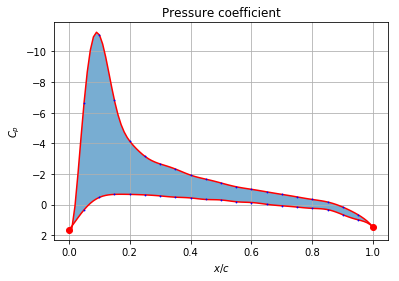

In [25]:
# plotting

deg = 5
#coef_u = 
coef_l = polyfit(x_norm,Cp_l,deg)
x_cont = linspace(x_norm[0],x_norm.iloc[-1],100) # continuous interval of x values

xfit = polyGen(x_cont,deg)
yfit_l = matmul(coef_l,transpose(xfit))

# INTERPOLATION~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
f_u = interpolate.interp1d(x_norm,Cp_u,deg)
print(f_u)
yinterp_u = f_u(x_cont)
f_l = interpolate.interp1d(x_norm,Cp_l,deg)
yinterp_l = f_l(x_cont)

# integrate over interpolated curve
upp_int = scipy.integrate.trapz(x_cont,yinterp_u)
low_int = scipy.integrate.trapz(x_cont,yinterp_l)
Cl = upp_int-low_int
print('Trapezoid rule:')
L = q_inf*Cl*chord
print("Cl = %f" %(Cl))
print('Lift:\n%f N' %(L))
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

fig, ax = plt.subplots()
#ax.plot(x_norm, coef_l[0]+x_norm*coef_l[1]+x_norm**2*coef_l[2])
#ax.plot(x_cont,yfit_l,'r',linewidth=0.8)
ax.plot(x_cont,yinterp_u,'r-')
ax.plot(x_cont,yinterp_l,'r-')

ax.plot(x_norm,Cp_u,'bo',markersize=0.85)
ax.plot(x_norm,Cp_l,'bo',markersize=0.85)
ax.plot(x_norm[a],Cp_l[a],'ro')
ax.plot(x_norm[b],Cp_u[b],'ro')
ax.fill_between(x_cont,yinterp_l,yinterp_u,alpha=0.6)
plt.xlabel('$x/c$')
plt.ylabel('$C_{p}$')
plt.title('Pressure coefficient')
plt.gca().invert_yaxis() # invert Y-axis by aerodynamic convention
plt.grid(True)
plt.show()